In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Dimensionality Reduction

From a given dataset we have the features 

$$
    x \in \mathbb{R}^{m \times n},
$$

where $m$ is the number of samples and $n$ is the number of features. 

Then we want to reduce the number of features $n$, such that

$$
    x \in \mathbb{R}^{m \times k},
$$

where $k < n$ (or even $k \ll n$).

## Iris dataset

In [2]:
# Load iris dataset
data = load_iris()

# Print dataset info
#print(data.DESCR)

In [3]:
# Create dataframe
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['Class'] = data.target
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
# Split data table into data X and class labels y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X.shape, y.shape

((150, 4), (150,))

In [5]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((105, 4), (45, 4), (105,), (45,))

In [6]:
# Standardize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
(X_train_std.mean(), X_train_std.std()), (X_test_std.mean(), X_test_std.std()) 

((3.6795963101862333e-16, 0.9999999999999999),
 (-0.08700211457774676, 0.9071408118354307))

## Principal Component Analysis

### Idea

Reduce dimensionality by mapping the data $X$ from the $n$ dimensional feature space to a $k$ dimensional subspace.

To keep as most information as possible




In [7]:
# Compute the covariance matrix
cov = np.cov(X_train_std.T)
cov

array([[ 1.00961538, -0.03658858,  0.89282533,  0.84057159],
       [-0.03658858,  1.00961538, -0.3421826 , -0.2898399 ],
       [ 0.89282533, -0.3421826 ,  1.00961538,  0.9779029 ],
       [ 0.84057159, -0.2898399 ,  0.9779029 ,  1.00961538]])

In [8]:
# Compute the correlation matrix
np.corrcoef(X_train.T)

array([[ 1.        , -0.03624011,  0.88432223,  0.83256615],
       [-0.03624011,  1.        , -0.33892372, -0.28707952],
       [ 0.88432223, -0.33892372,  1.        ,  0.96858954],
       [ 0.83256615, -0.28707952,  0.96858954,  1.        ]])

In [9]:
# Compute eigenvalues and eigenvectors 
# (Normalized eigenvectors in columns)
eigen_val, eigen_vec = np.linalg.eig(cov)
eigen_val, eigen_vec

(array([2.8998938 , 0.98708902, 0.13466453, 0.01681419]),
 array([[ 5.35470073e-01, -3.25785192e-01, -7.32074477e-01,
          2.66838470e-01],
        [-2.04282071e-01, -9.44860554e-01,  2.30528074e-01,
         -1.11194321e-01],
        [ 5.86159424e-01,  7.51890810e-04,  1.37369527e-01,
         -7.98464888e-01],
        [ 5.72675970e-01, -3.31960469e-02,  6.26141661e-01,
          5.28097411e-01]]))

In [10]:
# Check unit length of eigenvectors
np.dot(eigen_vec.T, eigen_vec)

array([[ 1.00000000e+00,  3.37808373e-16,  8.32024453e-18,
        -5.20083802e-17],
       [ 3.37808373e-16,  1.00000000e+00, -7.98252889e-16,
         7.09492045e-16],
       [ 8.32024453e-18, -7.98252889e-16,  1.00000000e+00,
         3.90694549e-17],
       [-5.20083802e-17,  7.09492045e-16,  3.90694549e-17,
         1.00000000e+00]])

In [11]:
# # Sort eigenpairs in decreasing order
idx = np.argsort(eigen_val)[::-1]
eigen_val = eigen_val[idx]
eigen_vec = eigen_vec[:, idx]
eigen_val, eigen_vec

(array([2.8998938 , 0.98708902, 0.13466453, 0.01681419]),
 array([[ 5.35470073e-01, -3.25785192e-01, -7.32074477e-01,
          2.66838470e-01],
        [-2.04282071e-01, -9.44860554e-01,  2.30528074e-01,
         -1.11194321e-01],
        [ 5.86159424e-01,  7.51890810e-04,  1.37369527e-01,
         -7.98464888e-01],
        [ 5.72675970e-01, -3.31960469e-02,  6.26141661e-01,
          5.28097411e-01]]))

In [12]:
# Compute explained variance
exp_var = eigen_val / sum(eigen_val)
exp_var

array([0.71806894, 0.24442204, 0.0333455 , 0.00416351])

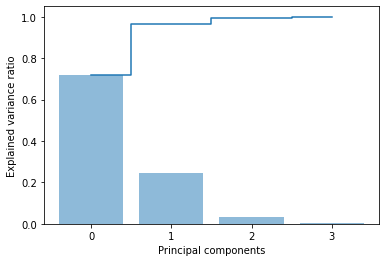

In [13]:
# Plot explained variance
plt.bar(range(len(eigen_val)), exp_var, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(len(eigen_val)), np.cumsum(exp_var), where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(len(eigen_val)))
plt.show()

### Projection matrix

The $n \times k$-dimensional projection matrix $W$ is composed of the corresponding eigenvectors of the $k$ largest eigenvalues. With this matrix we can map the datapoints onto a new $k$ dimensional subspace, that is

\begin{equation}
    Y = X \times W,
\end{equation}

where the $k$ columns of $Y$ are the principal components.

### 2 principal components

In [14]:
# Compute projection matrix for 2 principal components
n_comps = 2
W = np.vstack(eigen_vec[:, :n_comps])
W.shape

(4, 2)

In [15]:
# Project the training data to the subspace
prin_comps = np.dot(X_train_std, W)
prin_comps.shape

(105, 2)

In [16]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
# Plot 2 principal components
def plot_pca_2d(prin_comps, y, target_names):
    for i, n, c in zip(np.unique(y), target_names, ['b','r','g']):
        plt.scatter(prin_comps[y_train==i, 0], prin_comps[y_train==i, 1],
                    label=n, c=c, s=20, edgecolor='k')
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.legend(loc='best')
    plt.show()

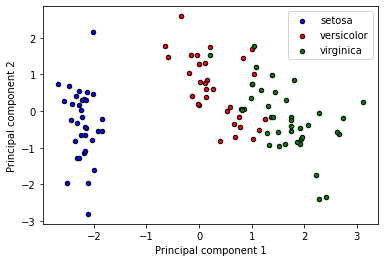

In [18]:
plot_pca_2d(prin_comps, y_train, data.target_names)

### 3 principal components

In [19]:
# Compute projection matrix for 3 principal components
n_comps = 3
W = np.vstack(eigen_vec[:, :n_comps])
W.shape

(4, 3)

In [20]:
# Project the training data to the subspace
prin_comps = np.dot(X_train_std, W)
prin_comps.shape

(105, 3)

In [21]:
# Plot 3 principal components
def plot_pca_3d(prin_comps, y, target_names, azim=-80, elev=20):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection ='3d', azim=azim, elev=elev,
                  xlabel='Principal component 1', 
                  ylabel='Principal component 2',
                  zlabel='Principal component 3')
    for i, l, c in zip(np.unique(y), target_names, ['b','r','g']):
        ax.scatter(prin_comps[y==i, 0], prin_comps[y==i, 1],
                   prin_comps[y==i, 2], c=c, s=20, edgecolor='k', label=l)
    ax.legend()
    plt.show()

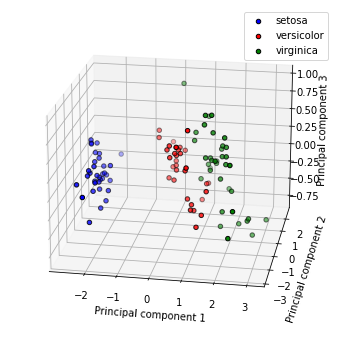

In [22]:
plot_pca_3d(prin_comps, y_train, data.target_names)